In [1]:
# Copyright 2018-2020 Erasmus+ ICCT Project Consortium
#
# Redistribution and use in source and binary forms, with or without modification, 
# are permitted provided that the following conditions are met:
#
# 1. Redistributions of source code must retain the above copyright notice, 
# this list of conditions and the following disclaimer.
#
# 2. Redistributions in binary form must reproduce the above copyright notice, 
# this list of conditions and the following disclaimer in the documentation and/or 
# other materials provided with the distribution.
#
# 3. Neither the name of the copyright holder nor the names of its contributors
# may be used to endorse or promote products derived from this software without specific prior written permission.
#
# THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS" AND ANY EXPRESS OR IMPLIED WARRANTIES, 
# INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE DISCLAIMED.
# IN NO EVENT SHALL THE COPYRIGHT HOLDER OR CONTRIBUTORS BE LIABLE FOR ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, 
# OR CONSEQUENTIAL DAMAGES (INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR SERVICES; LOSS OF USE, DATA, 
# OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER CAUSED AND ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY, 
# OR TORT (INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE OF THIS SOFTWARE, EVEN IF ADVISED OF THE 
# POSSIBILITY OF SUCH DAMAGE.

In [2]:
from IPython.display import HTML

# # Cell visibility - COMPLETE:
# tag = HTML('''<style> div.input {display:none;} </style>''')

#Cell visibility - TOGGLE:
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.input').hide()
    } else {
        $('div.input').show()
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<p style="text-align:right">
Toggle cell visibility <a href="javascript:code_toggle()">here</a>.</p>''')

display(tag)

In [3]:
%matplotlib notebook
import numpy as np
import control as control
import matplotlib.pyplot as plt
import ipywidgets as widgets
import scipy.signal as signal
continuous_update=False

## Time response of the first-order system

The transfer function of the selected first-order system is defined as

\begin{equation}
    \frac{K_p}{\tau_p s+1},
\end{equation}

where $K_p$ and $\tau_p$ are parameters of the system. 

System response depends on the input signal. In this example unit step function (with the Laplace transform $\frac{1}{s}$), unit impulse function (with the Laplace transform $1$), unit ramp function (with the Laplace transform $\frac{1}{s^2}$) and a sine signal (with the Laplace transform $\frac{1}{s^2+1}$) are used as possible input signals. 

The plot below shows the input signal and the corresponding output signal for the chosen values of parameters $K_p$ and $\tau_p$.

### How to use this notebook?

Toogle between different input functions (unit step, unit impulse, unit ramp or sine). Move the sliders to change the values of $K_p$ and $\tau_p$. 

<IPython.core.display.Javascript object>


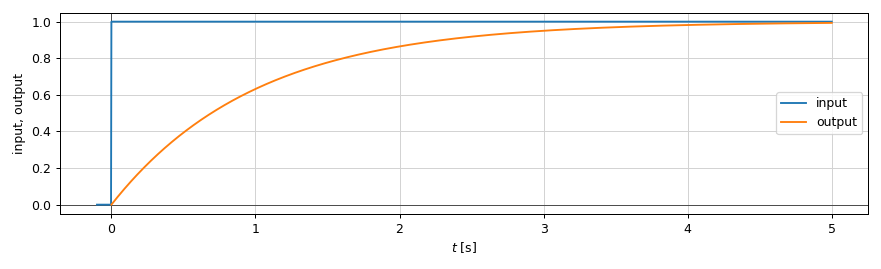

ToggleButtons(description='Select: ', options=(('unit step function', 0), ('unit impulse function', 1), ('unit…

FloatSlider(value=1.0, description='$K_p$', layout=Layout(flex='5 5 auto', width='auto'), max=2.0, readout_for…

FloatSlider(value=1.0, description='$\\tau_p$', layout=Layout(flex='5 5 auto', width='auto'), max=2.0, readout…

Output()

In [4]:
# sinus, step, ramp, x^2, sqrt(x)
functionSelect = widgets.ToggleButtons(
    options=[('unit step function', 0), ('unit impulse function', 1), ('unit ramp function', 2), ('sine function', 3)],
    description='Select: ')

fig = plt.figure(num='Time response of the first-order system')
fig.set_size_inches((9.8, 3))
fig.set_tight_layout(True)
f1 = fig.add_subplot(1, 1, 1)

f1.grid(which='both', axis='both', color='lightgray')

f1.set_xlabel('$t$ [s]')
f1.set_ylabel('input, output')

f1.axhline(0,Color='black',linewidth=0.5)
f1.axvline(0,Color='black',linewidth=0.5)

inputf, = f1.plot([],[])
responsef, = f1.plot([],[])
arrowf, = f1.plot([],[])

num_samples=2041

def create_draw_functions(Kp,taup,index):
    t=np.linspace(-0.1,5,num_samples)

    num=[Kp]
    den=[taup,1]
    Wsys=control.tf(num,den)
    
    global inputf,responsef, arrowf
       
    if index==0:
        yin=np.zeros(2041)
        yin[40:num_samples]=1
        tnew=np.linspace(0,5,2001)
        tout,yout=control.step_response(Wsys, T=tnew)
    elif index==1:
        yin=signal.unit_impulse(2001, 0)
        tnew=np.linspace(0,5,2001)
        t=tnew
        tout,yout=control.impulse_response(Wsys,tnew,X0=0)
    elif index==2:
        yin=np.zeros(num_samples)
        yin[40:num_samples]=np.linspace(0,5,2001)
        tnew=np.linspace(0,5,2001)
        tout,yout,xx=control.forced_response(Wsys,tnew,yin[40:])
    elif index==3:        
        yin=np.sin(np.linspace(0,30,2001))
        tnew=np.linspace(0,30,2001)
        t=tnew
        tout,yout,xx=control.forced_response(Wsys,tnew,yin)
        
    f1.lines.remove(inputf)
    f1.lines.remove(responsef)
    f1.lines.remove(arrowf)
    
    inputf, = f1.plot(t,yin,color='C0',label='input')
    responsef, = f1.plot(tout,yout,color='C1',label='output')

    if index == 1:
        arrowf, = f1.plot([-0.1,0,0.1],[0.95,1,0.95],color='C0')
    else:
        arrowf, = f1.plot([],[])
    
  
    f1.legend()
    
    f1.relim()
    f1.relim()
    f1.autoscale_view()
    f1.autoscale_view()
    
Kp_slider = widgets.FloatSlider(value=1, min=0, max=2, step=0.1, description='$K_p$',
                          continuous_update=True, layout=widgets.Layout(width='auto', flex='5 5 auto'),readout_format='.1f')

taup_slider = widgets.FloatSlider(value=1, min=0, max=2, step=0.1, description='$\\tau_p$',
                          continuous_update=True, layout=widgets.Layout(width='auto', flex='5 5 auto'),readout_format='.1f')


input_data = widgets.interactive_output(create_draw_functions, {'Kp':Kp_slider,
                                                                'taup':taup_slider,
                                                                'index':functionSelect})

def update_sliders(index):
    global x0_slider
    
    Kpval = [1,1,1,1]
    Kp_slider.value = Kpval[index]
    taupval = [1,1,1,1]
    taup_slider.value = taupval[index]    
    
input_data2 = widgets.interactive_output(update_sliders, {'index':functionSelect})

display(functionSelect)

display(Kp_slider,taup_slider,input_data)

# display(Markdown("The system can be represented as $f(x)=5$ for small excursions of x about x0."))